![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> Binary Classification Exercise (Breast Cancer - Solution)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainTrainLinearClassifier.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})

### Load breast cancer data:

In [ ]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

In [2]:
#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

mX.shape, vY.shape

((569, 30), (569,))

In [3]:
vY[vY == 0] = -1
vY

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1

#### Define:
$$\tilde{\boldsymbol{X}}=\left[\begin{matrix}-1 & - & x_{1} & -\\
-1 & - & x_{2} & -\\
 & \vdots\\
-1 & - & x_{N} & -
\end{matrix}\right]\in\mathbb{R}^{N\times31}$$

In [7]:
N       = len(vY)
mTildeX = np.c_[-np.ones((N, 1)), mX]
mTildeX.shape

(569, 31)

#### Sigmoid:
$$\sigma\left(\alpha\right)=\frac{\exp\left(\alpha\right)}{1+\exp\left(\alpha\right)}$$
#### Sigmoid derivative:
$$\frac{\text{d}\sigma\left(\alpha\right)}{\text{d}\alpha}=\frac{\exp\left(\alpha\right)}{\left(1+\exp\left(\alpha\right)\right)^{2}}$$
#### Objective gradient:
$$\nabla_{\tilde{\boldsymbol{w}}}J\left(\tilde{\boldsymbol{w}}\right)=\frac{2}{N}\tilde{\boldsymbol{X}}^{T}\sigma'\left(\text{diag}\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)\right)\left(\sigma\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)-\boldsymbol{y}\right)$$

In [8]:
def sigmoid(α):
    return np.exp(α) / (np.exp(α) + 1)

def Dsigmoid(α):
    return np.exp(α) / (np.exp(α) + 1)**2

def ComputeGradient(vTildeW):
    return 2 * (mTildeX.T * Dsigmoid(mTildeX @ vTildeW).T) @ (sigmoid(mTildeX @ vTildeW) - vY[:,None]) / N

#### Accuracy function:

In [9]:
def Accuracy(vW, mX, vY):
    return np.mean(np.sign(mX @ vW).squeeze() == vY)

#### Apply gradient descent:

<IPython.core.display.Javascript object>


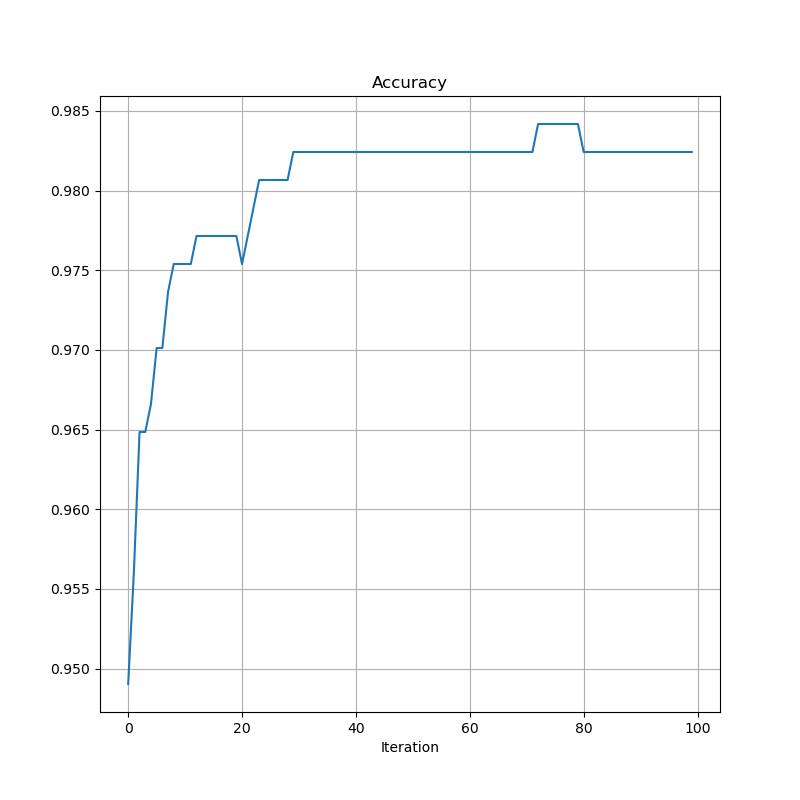

0.9490333919156415
0.9560632688927944
0.9648506151142355
0.9648506151142355
0.9666080843585237
0.9701230228471002
0.9701230228471002
0.9736379613356766
0.9753954305799648
0.9753954305799648
0.9753954305799648
0.9753954305799648
0.9771528998242531
0.9771528998242531
0.9771528998242531
0.9771528998242531
0.9771528998242531
0.9771528998242531
0.9771528998242531
0.9771528998242531
0.9753954305799648
0.9771528998242531
0.9789103690685413
0.9806678383128296
0.9806678383128296
0.9806678383128296
0.9806678383128296
0.9806678383128296
0.9806678383128296
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075571178
0.9824253075

In [16]:
%matplotlib notebook

vAcc    = []
vTildeW = np.random.randn(31, 1)
K       = 100
µ       = 10

fig     = plt.figure(figsize=(8, 8))
plt.plot()
for ii in range(K):
    #-- Gradient descent step:
    vTildeW -= µ * ComputeGradient(vTildeW)
    
    #-- Plot:
    vAcc.append(Accuracy(vTildeW, mTildeX, vY))
    print(vAcc[-1])    
    
    fig.axes[0].cla()
    plt.grid(True)
    plt.plot(vAcc)
    plt.title('Accuracy')
    plt.xlabel('Iteration')
    
    fig.canvas.draw()
    plt.pause(1e-20)
        
plt.show()